# This File contain Final analysis for I4.0 Project 


## Loading the dataset and doing a basic EDA part

In [2]:
# Importing all the library 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE

In [3]:
# Loading the dataset 

df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv")

In [4]:
# seeing more info about the dataset

df.dtypes

Employee_ID                      int64
Department                      object
Gender                          object
Age                              int64
Job_Title                       object
Hire_Date                       object
Years_At_Company                 int64
Education_Level                 object
Performance_Score                int64
Monthly_Salary                 float64
Work_Hours_Per_Week              int64
Projects_Handled                 int64
Overtime_Hours                   int64
Sick_Days                        int64
Remote_Work_Frequency            int64
Team_Size                        int64
Training_Hours                   int64
Promotions                       int64
Employee_Satisfaction_Score    float64
Resigned                          bool
dtype: object

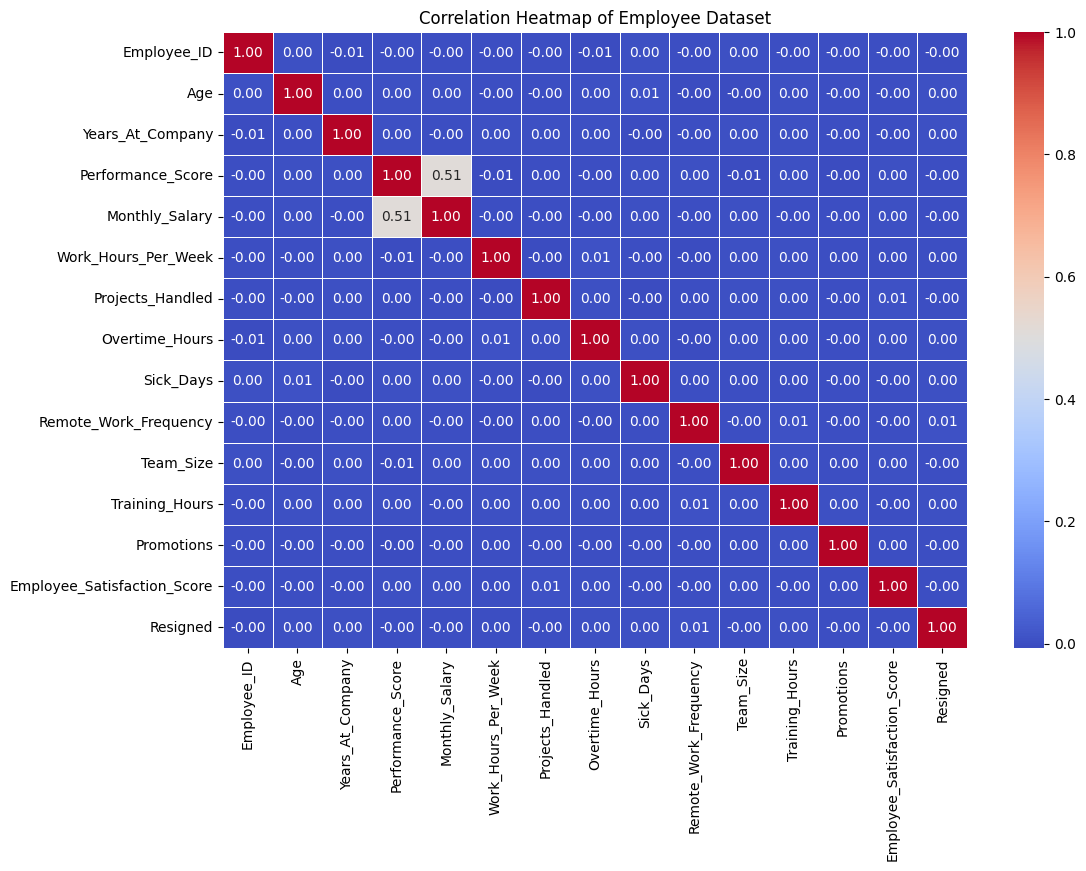

In [5]:
# Some graphs and basic EDA to understand the data

numeric_cols = df.select_dtypes(include=['int64', 'float64', 'bool'])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Employee Dataset')

plt.show()

/var/folders/09/2_cb5_9n0_lfspghf0sqrclc0000gn/T/ipykernel_12533/3119771294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Performance_Score"], y=df["Monthly_Salary"], palette="coolwarm")


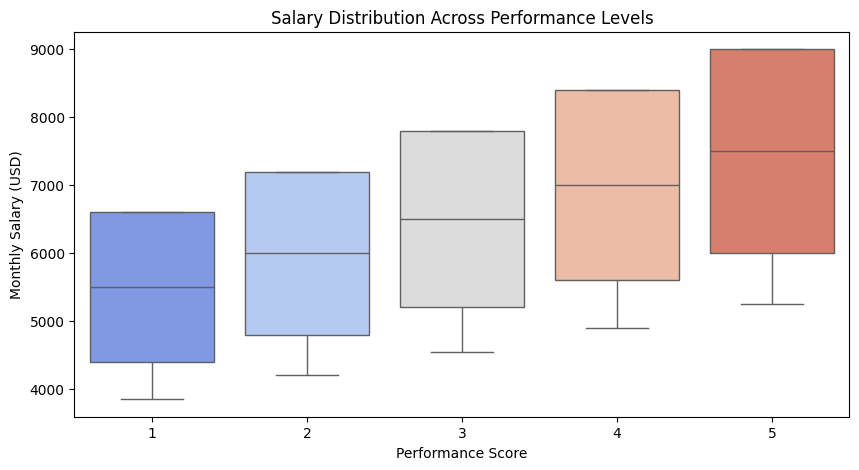

In [6]:
# Salary distribution across performance scores
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Performance_Score"], y=df["Monthly_Salary"], palette="coolwarm")
plt.title("Salary Distribution Across Performance Levels")
plt.xlabel("Performance Score")
plt.ylabel("Monthly Salary (USD)")
plt.show()


/var/folders/09/2_cb5_9n0_lfspghf0sqrclc0000gn/T/ipykernel_12533/2443164606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Resigned"], y=df["Monthly_Salary"], palette="coolwarm")


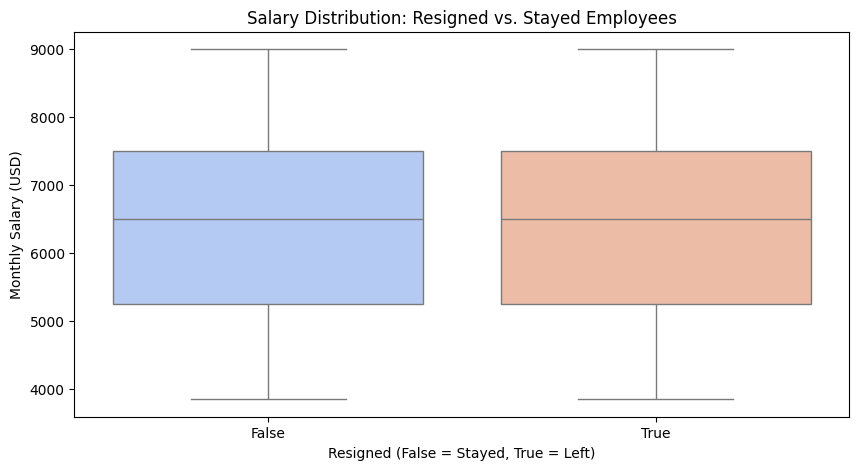

In [7]:
# Compare salary distribution for employees who resigned vs. stayed
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Resigned"], y=df["Monthly_Salary"], palette="coolwarm")
plt.title("Salary Distribution: Resigned vs. Stayed Employees")
plt.xlabel("Resigned (False = Stayed, True = Left)")
plt.ylabel("Monthly Salary (USD)")
plt.show()


/var/folders/09/2_cb5_9n0_lfspghf0sqrclc0000gn/T/ipykernel_12533/3717322581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Performance_Score"], y=df["Resigned"].astype(int), palette="coolwarm")


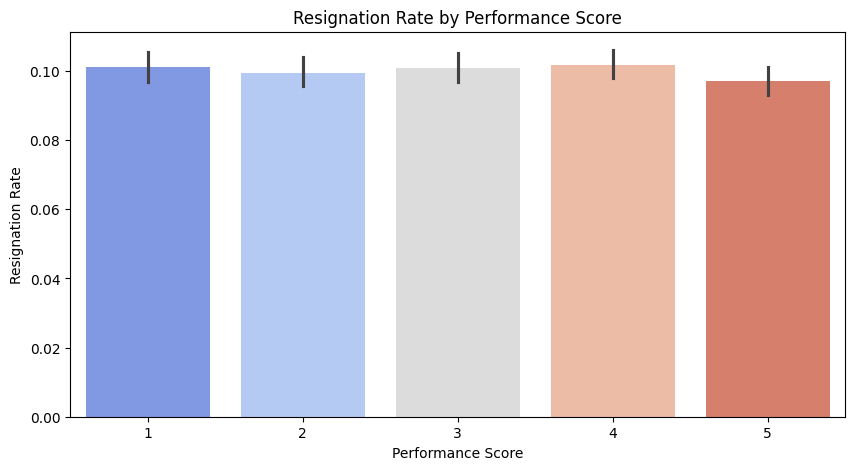

In [8]:
# Analyzing resignation rates across performance levels
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Performance_Score"], y=df["Resigned"].astype(int), palette="coolwarm")
plt.title("Resignation Rate by Performance Score")
plt.xlabel("Performance Score")
plt.ylabel("Resignation Rate")
plt.show()


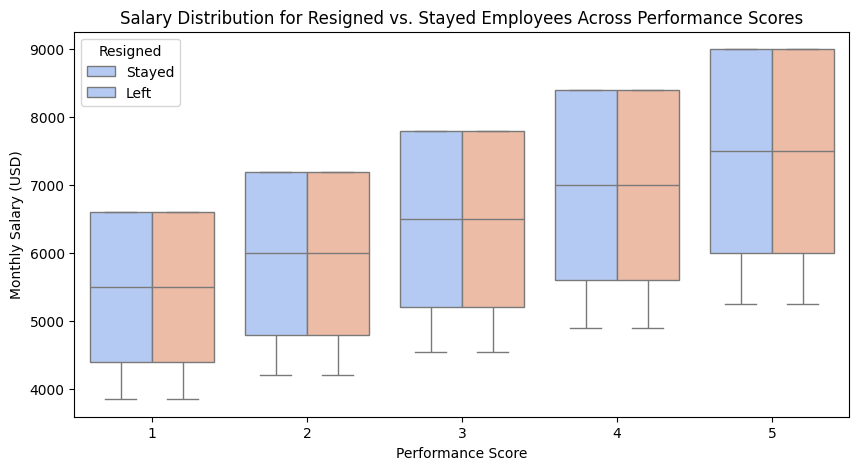

In [9]:
# Compare salaries of resigned vs. stayed employees within each performance score
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Performance_Score"], y=df["Monthly_Salary"], hue=df["Resigned"], palette="coolwarm")
plt.title("Salary Distribution for Resigned vs. Stayed Employees Across Performance Scores")
plt.xlabel("Performance Score")
plt.ylabel("Monthly Salary (USD)")
plt.legend(title="Resigned", labels=["Stayed", "Left"])
plt.show()


**From the above EDA we can see that the data we are working with is very uniform and nopt giing too much information on the basis of a basic EDA so we will do some more complex analysis and try to find some meaning full outcome.**

# So our goal is to "Optimizing Salary Structures for Performance Enhancement and Employee Retention in a Corporate Environment"

1. Salary vs. Performance
- Goal: Identify whether there’s a correlation between an employee’s salary and their performance score.

- What to do:

- Scatter plot: Plot Monthly_Salary vs. Performance_Score.
- Correlation coefficient: Calculate the Pearson correlation to check the strength of the relationship.

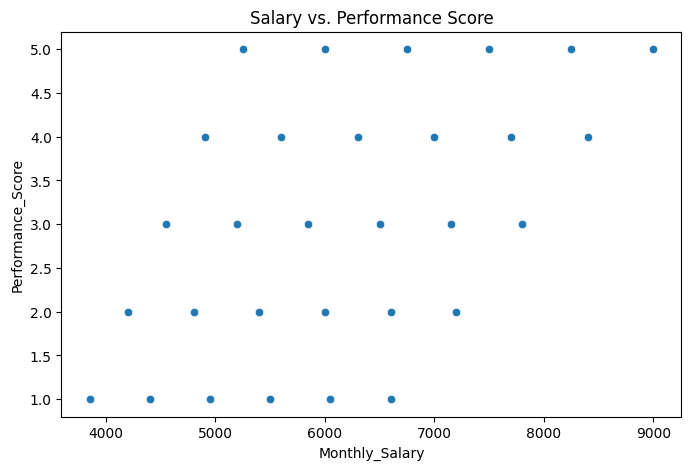

Pearson correlation coefficient: 0.51


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Monthly_Salary', y='Performance_Score', data=df)
plt.title('Salary vs. Performance Score')
plt.show()

# Correlation coefficient
correlation = stats.pearsonr(df['Monthly_Salary'], df['Performance_Score'])
print(f"Pearson correlation coefficient: {correlation[0]:.2f}")


2. Retention Factors
- Goal: Identify which factors (salary, job satisfaction, promotions) contribute to employee resignation.

- What to do:

- Compare means: Look at salary differences between resigned and non-resigned employees.
- Box plot: Show salary distributions for both groups.
- Chi-square test: Test associations between Resigned and categorical variables like Department or Education_Level.

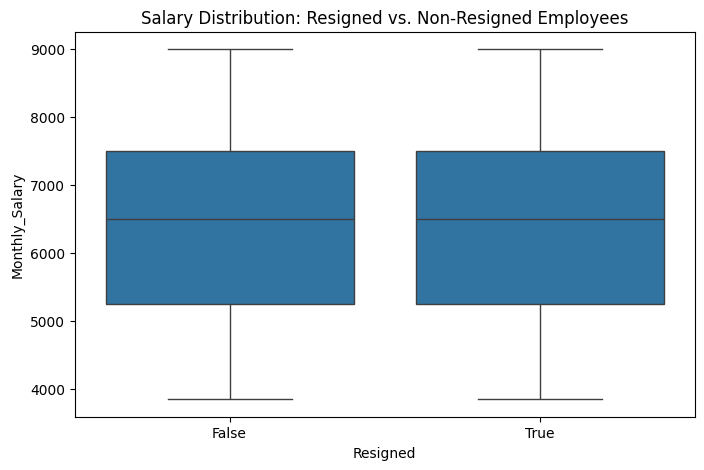

            count         mean          std     min     25%     50%     75%  \
Resigned                                                                      
False     89990.0  6403.908768  1372.921587  3850.0  5250.0  6500.0  7500.0   
True      10010.0  6396.938062  1368.843857  3850.0  5250.0  6500.0  7500.0   

             max  
Resigned          
False     9000.0  
True      9000.0  
Chi-square test: p-value = 0.3274


In [11]:
# Salary distribution for resigned vs non-resigned employees
plt.figure(figsize=(8, 5))
sns.boxplot(x='Resigned', y='Monthly_Salary', data=df)
plt.title('Salary Distribution: Resigned vs. Non-Resigned Employees')
plt.show()

# Group statistics
print(df.groupby('Resigned')['Monthly_Salary'].describe())

# Chi-square test for Resigned vs Department
contingency_table = pd.crosstab(df['Department'], df['Resigned'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test: p-value = {p:.4f}")

3. Incentive Impact
- Goal: Investigate how factors like overtime, projects handled, and promotions influence salary and retention.

- What to do:

- Bar plot: Compare average salaries based on overtime hours.
- Regression plot: Show if promotions impact salary growth.

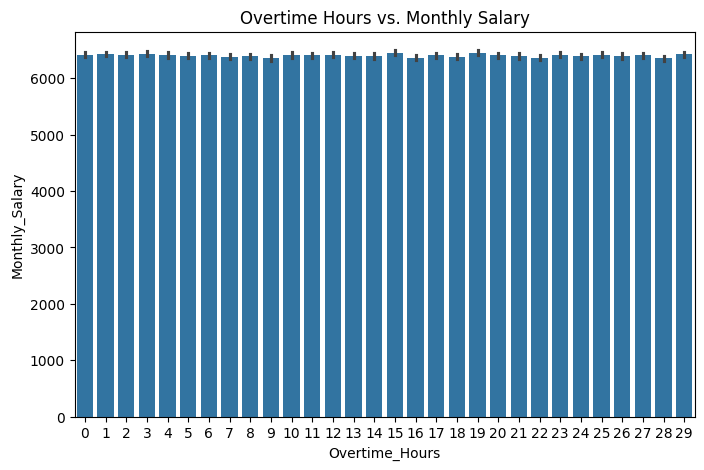

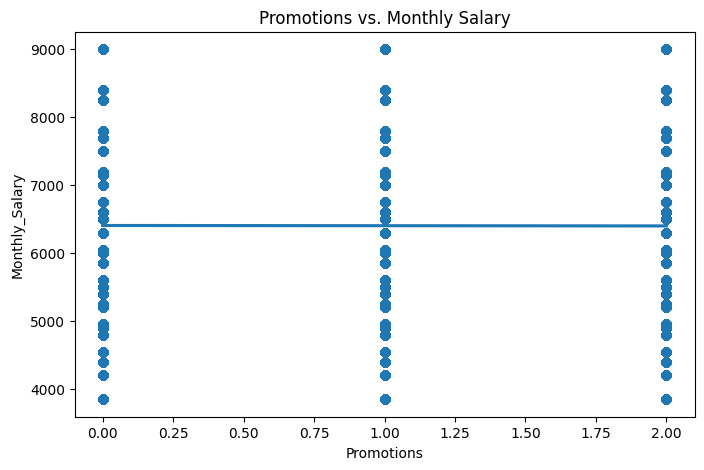

Correlation between Training Hours and Promotions: 0.00


In [12]:
# Overtime vs Salary
plt.figure(figsize=(8, 5))
sns.barplot(x='Overtime_Hours', y='Monthly_Salary', data=df)
plt.title('Overtime Hours vs. Monthly Salary')
plt.show()

# Promotions vs Salary
plt.figure(figsize=(8, 5))
sns.regplot(x='Promotions', y='Monthly_Salary', data=df)
plt.title('Promotions vs. Monthly Salary')
plt.show()

# Correlation between Training Hours and Promotions
correlation = stats.pearsonr(df['Training_Hours'], df['Promotions'])
print(f"Correlation between Training Hours and Promotions: {correlation[0]:.2f}")


4. Segment Analysis
- Goal: Identify if gender or department influences salary, performance, or retention rates.

- What to do:

- Gender pay gap: Compare average salaries by gender.
- Department-wise trends: Analyze which departments have higher performance scores or more resignations.

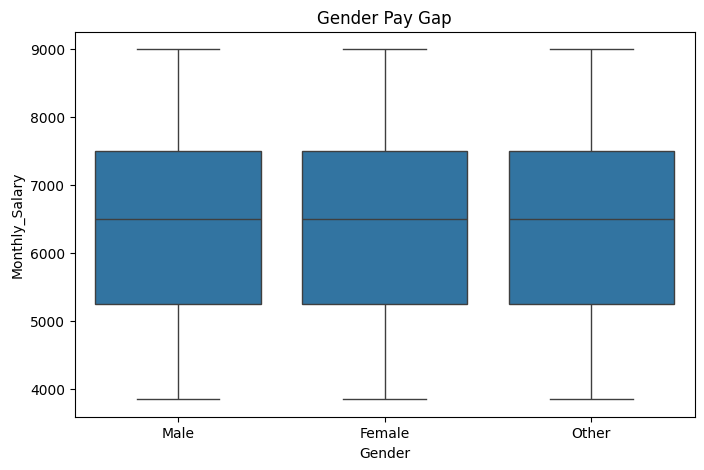

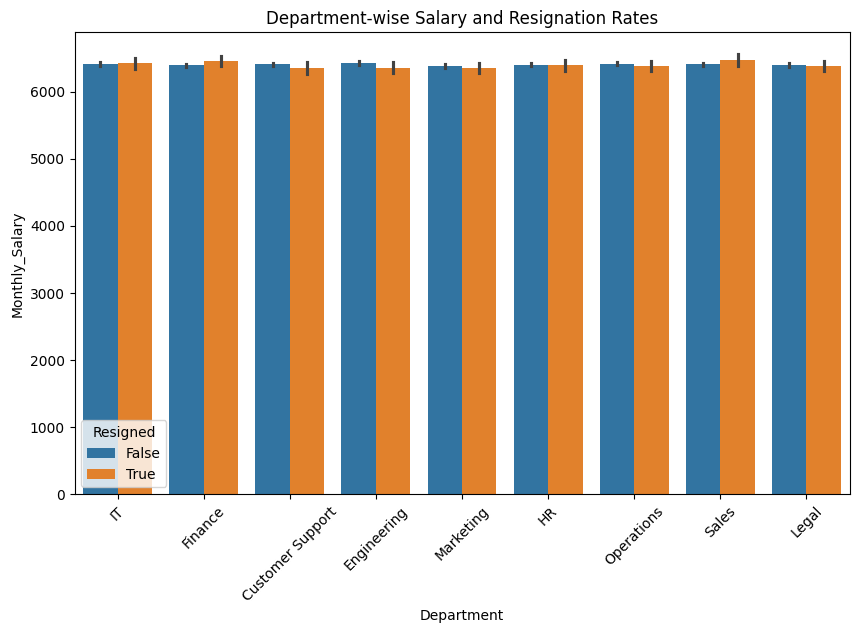

Gender
Female    6404.986354
Male      6400.481980
Other     6414.768145
Name: Monthly_Salary, dtype: float64
Department
Finance             0.105357
HR                  0.102646
Legal               0.102177
Marketing           0.100303
Operations          0.100259
Sales               0.099263
Customer Support    0.098777
Engineering         0.096477
IT                  0.095589
Name: Resigned, dtype: float64


In [13]:
# Gender pay gap
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Monthly_Salary', data=df)
plt.title('Gender Pay Gap')
plt.show()

# Department vs Salary and Resigned
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Monthly_Salary', hue='Resigned', data=df)
plt.title('Department-wise Salary and Resignation Rates')
plt.xticks(rotation=45)
plt.show()

# Gender-based average salaries
print(df.groupby('Gender')['Monthly_Salary'].mean())

# Department-wise resignation rates
resignation_rates = df.groupby('Department')['Resigned'].mean()
print(resignation_rates.sort_values(ascending=False))


## Conclusion from Analysis and Insights
**Based on the analysis of the relationship between salary, performance, and retention, we can draw the following conclusions:**

1. **Salary vs. Performance:**

- The Pearson correlation coefficient of 0.51 suggests a moderate positive relationship between salary and performance scores. This indicates that higher-performing employees tend to have higher salaries, but the correlation isn't strong enough to suggest a direct or automatic link. Other factors may also be at play, such as tenure or job role.

2. **Retention Factors:**

- The average monthly salary of employees who resigned (6396.94) and those who didn’t (6403.91) shows no significant difference. This suggests that salary alone may not be a key factor in why employees leave.
- The Chi-square test (p-value = 0.3274) shows no strong association between resignation and departments, meaning departmental factors may not directly impact resignations the reasons for employee exits might be more personal or tied to other aspects like work environment, career growth, or leadership.

3. **Incentive Impact:**

- The correlation between training hours and promotions is 0.00, indicating no relationship between training hours and promotions. This might suggest that promotions are influenced by factors like job performance or seniority rather than training hours, or that the current training programs aren’t effectively linked to career advancement.

4. **Segment Analysis:**

- Gender pay gap: There is no significant gender pay gap observed, as the average monthly salaries are quite close — Female (6404.99), Male (6400.48), and Other (6414.77). This reflects fair salary distribution across genders.
- Department-wise resignation rates: The resignation rates across departments are fairly similar, ranging from 9.55% in IT to 10.53% in Finance. This small variation suggests no particular department is experiencing an alarming turnover rate.


**Key Takeaways:**

- While performance moderately influences salary, other factors (like experience or job role) might also be crucial.
- Salary doesn’t seem to drive resignations, so retention strategies should likely focus on non-monetary aspects — career growth, job satisfaction, and work environment.
- Training hours have no impact on promotions, signaling a potential disconnect between employee development programs and career progression.
- Gender-based pay seems equitable, and resignation rates are fairly consistent across departments.

# Lets build some predictive models and analyze the data more to find somthing substantial

## Let’s start by predicting employee resignations (target variable: Resigned).

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separating features (X) and target variable (y)
X = df.drop(columns=['Resigned'])
y = df['Resigned']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(y_resampled.value_counts())


ValueError: could not convert string to float: 'HR'

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Random Forest model with class balancing
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf_random = RandomizedSearchCV(rf_model, param_dist, n_iter=20, cv=5, scoring='roc_auc', random_state=42)
rf_random.fit(X_train, y_train)

# Best parameters
print("Best parameters:", rf_random.best_params_)

# Train the model with best parameters
best_rf = rf_random.best_estimator_
best_rf.fit(X_train, y_train)

# Predictions
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = best_rf.score(X_test, y_test)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ashutosh/Codes/Projects/I4_project/env_i4/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ashutosh/Codes/Projects/I4_project/env_i4/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/ashutosh/Codes/Projects/I4_project/env_i4/lib/python3.13/site-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
           ~~~~~~~~~~~~~^
        self,
        ^^^^^
    ...<5 lines>...
        ensure_all_finite=False,
        ^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/Users/ashutosh/Codes/Projects/I4_project/env_i4/lib/python3.13/site-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ashutosh/Codes/Projects/I4_project/env_i4/lib/python3.13/site-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        X,
    ...<12 lines>...
        input_name="X",
    )
  File "/Users/ashutosh/Codes/Projects/I4_project/env_i4/lib/python3.13/site-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Users/ashutosh/Codes/Projects/I4_project/env_i4/lib/python3.13/site-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Users/ashutosh/Codes/Projects/I4_project/env_i4/lib/python3.13/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'HR'


Confusion Matrix:
[[26969     0]
 [ 3031     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     26969
           1       0.00      0.00      0.00      3031

    accuracy                           0.90     30000
   macro avg       0.45      0.50      0.47     30000
weighted avg       0.81      0.90      0.85     30000


Accuracy Score: 0.8989666666666667


/Users/ashutosh/Codes/Projects/I4_project/env_i4/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ashutosh/Codes/Projects/I4_project/env_i4/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ashutosh/Codes/Projects/I4_project/env_i4/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

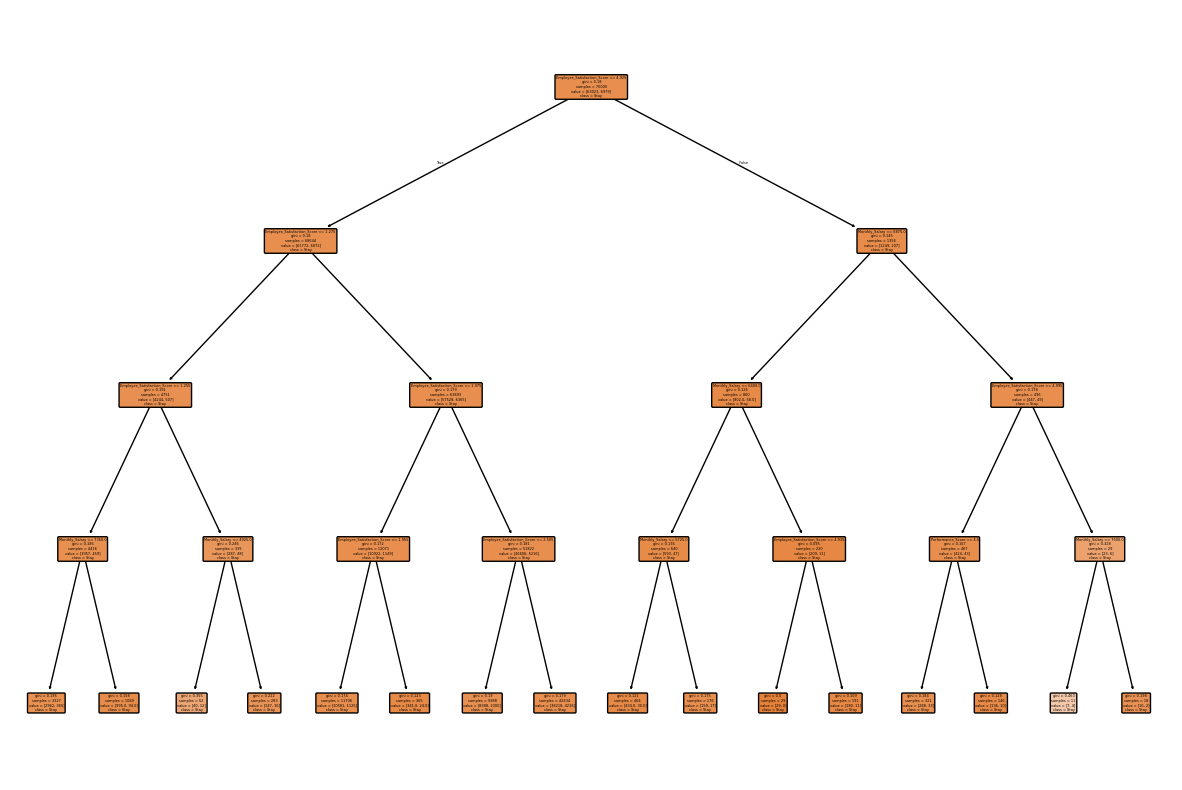

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree

# Define features (X) and target (y)
X = df[['Monthly_Salary', 'Performance_Score', 'Employee_Satisfaction_Score']]
y = df['Resigned'].astype(int)  # Ensure binary (0 or 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Stay', 'Resign'], filled=True, rounded=True)
plt.show()


Model Coefficients: [4.93792795e+02 4.45903536e+00 4.82035600e-01]
Intercept: 4914.561606610151

Mean Squared Error (MSE): 1388755.7102091094
R-squared: 0.26236839171171145


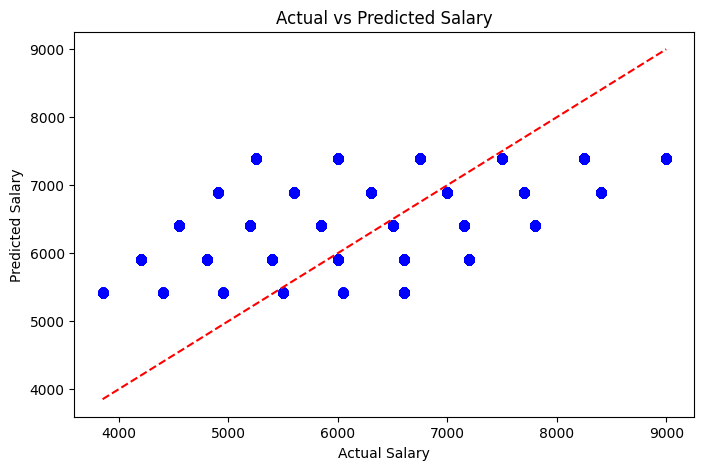

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df[['Performance_Score', 'Promotions', 'Years_At_Company']]
y = df['Monthly_Salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions
y_pred = reg_model.predict(X_test)

# Model evaluation
print("Model Coefficients:", reg_model.coef_)
print("Intercept:", reg_model.intercept_)

print("\nMean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Visualization of Predictions vs Actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()


In [18]:
# Create performance tiers based on quantiles
def performance_tier(score):
    if score <= df['Performance_Score'].quantile(0.33):
        return 'Low'
    elif score <= df['Performance_Score'].quantile(0.66):
        return 'Medium'
    else:
        return 'High'

df['Performance_Tier'] = df['Performance_Score'].apply(performance_tier)

# Calculate salary ranges for each Job_Title and Performance_Tier
salary_ranges = df.groupby(['Job_Title', 'Performance_Tier'])['Monthly_Salary'].agg(['min', 'max', 'mean']).reset_index()

print("Salary Ranges by Job Title and Performance Tier:")
print(salary_ranges)


Salary Ranges by Job Title and Performance Tier:
     Job_Title Performance_Tier     min     max         mean
0      Analyst             High  6000.0  6000.0  6000.000000
1      Analyst              Low  4400.0  4800.0  4601.148026
2      Analyst           Medium  5200.0  5600.0  5399.614508
3   Consultant             High  8250.0  8250.0  8250.000000
4   Consultant              Low  6050.0  6600.0  6320.980806
5   Consultant           Medium  7150.0  7700.0  7424.706927
6    Developer             High  7500.0  7500.0  7500.000000
7    Developer              Low  5500.0  6000.0  5745.725750
8    Developer           Medium  6500.0  7000.0  6746.832101
9     Engineer             High  9000.0  9000.0  9000.000000
10    Engineer              Low  6600.0  7200.0  6902.552286
11    Engineer           Medium  7800.0  8400.0  8094.083045
12     Manager             High  9000.0  9000.0  9000.000000
13     Manager              Low  6600.0  7200.0  6894.941770
14     Manager           Medium  780

In [19]:
# Define bonus percentages
def calculate_bonus(row):
    if row['Performance_Tier'] == 'High':
        return row['Monthly_Salary'] * 0.20
    elif row['Performance_Tier'] == 'Medium':
        return row['Monthly_Salary'] * 0.10
    else:
        return 0

df['Bonus'] = df.apply(calculate_bonus, axis=1)

# View employees with their bonuses
print(df[['Job_Title', 'Performance_Tier', 'Monthly_Salary', 'Bonus']].head())


    Job_Title Performance_Tier  Monthly_Salary   Bonus
0  Specialist             High          6750.0  1350.0
1   Developer             High          7500.0  1500.0
2  Specialist           Medium          5850.0   585.0
3     Analyst              Low          4800.0     0.0
4     Analyst              Low          4800.0     0.0


In [20]:
def non_monetary_rewards(row):
    if row['Performance_Tier'] == 'High':
        return ['Extra Training', 'Flex Hours', 'Recognition']
    elif row['Performance_Tier'] == 'Medium':
        return ['Extra Training', 'Mentorship']
    else:
        return ['Mentorship']

df['Non_Monetary_Rewards'] = df.apply(non_monetary_rewards, axis=1)

print(df[['Job_Title', 'Performance_Tier', 'Non_Monetary_Rewards']].head())


    Job_Title Performance_Tier                       Non_Monetary_Rewards
0  Specialist             High  [Extra Training, Flex Hours, Recognition]
1   Developer             High  [Extra Training, Flex Hours, Recognition]
2  Specialist           Medium               [Extra Training, Mentorship]
3     Analyst              Low                               [Mentorship]
4     Analyst              Low                               [Mentorship]
